In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))


def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units|
    """
    # input là a_in , nhân với w + b tính sigmoid để ra g- a_out
    m,n = a_in.shape
    a_out = np.zeros(n)
    # trong đó m = số w (so dong) và n = số unit (so cot)
    for j in range(n):
        z= np.dot(a_in,W[:,j]) + b[j]
        a_out[j] =  g(z)
    z = np.matmul(a_in,w) + b
    a_out = sigmoid(z)
    return a_out

In [ ]:
def my_sequential(x, W1, b1, W2, b2):
    a1=my_dense(x, W1, b1, sigmoid)
    a2=my_dense(a1, W2, bb, sigmoid)
    fx=a2
    return fx

In [ ]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [ ]:
def my_predict(X, W1, b1, W2, b2):
    my_sequential(X, W1, b1, W2, b2)

In [ ]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [ ]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

In [ ]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
# load dataset
X, y = load_data()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statment below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

In [ ]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation="sigmoid"),
        Dense(15, activation="sigmoid"),
        Dense(1, activation="sigmoid")
        ### END CODE HERE ### 
    ]
)                            


In [ ]:

model.summary()

In [ ]:
# UNIT TESTS
from public_tests import * 

test_c1(model)

In [22]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [23]:
[layer1, layer2, layer3] = model.layers


In [24]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [25]:
print(model.layers[2].weights)

[<tf.Variable 'dense_14/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.23332444],
       [ 0.5292284 ],
       [-0.5002719 ],
       [ 0.5576392 ],
       [ 0.5521801 ],
       [ 0.06726366],
       [-0.25200716],
       [-0.4969089 ],
       [-0.5966946 ],
       [ 0.44436342],
       [ 0.47719187],
       [-0.6103225 ],
       [ 0.21892363],
       [-0.37913108],
       [-0.06919879]], dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [26]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6044
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4165
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1211
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0917
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 13/20
32/32 [==============================

In [27]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 91ms/step
 predicting a zero: [[0.01174941]]
1/1 [==============================] - 0s 18ms/step
 predicting a one:  [[0.9873022]]


1/1 [==============================] - 0s 23ms/step


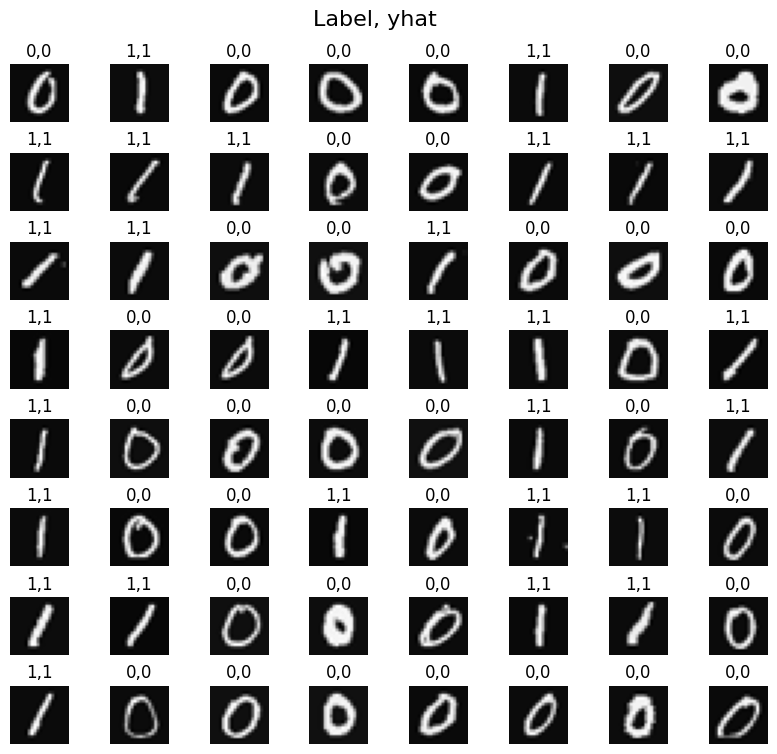

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [34]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    z=np.matmul(a_in.T,W) +b
    return g(z)

In [35]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor([0.54735762 0.57932425 0.61063923], shape=(3,), dtype=float64)


**Expected Output**
```
[0.54735762 0.57932425 0.61063923]
```

In [36]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


In [40]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):

    a1 = my_dense(x, W1, b1,sigmoid)
    a2 = my_dense(a1, W2, b2,sigmoid)
    a3 = my_dense(a2, W3, b3,sigmoid)

    return a3

In [43]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

NameError: name 'my_dense_v' is not defined

In [42]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

AttributeError: EagerTensor object has no attribute 'T'. 
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()
      

In [48]:
# UNQ_C3
# GRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    
    z=np.matmul(A_in,W) +b
### END CODE HERE ### 
    return g(z)

In [49]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [50]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


In [51]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [52]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [53]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [54]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


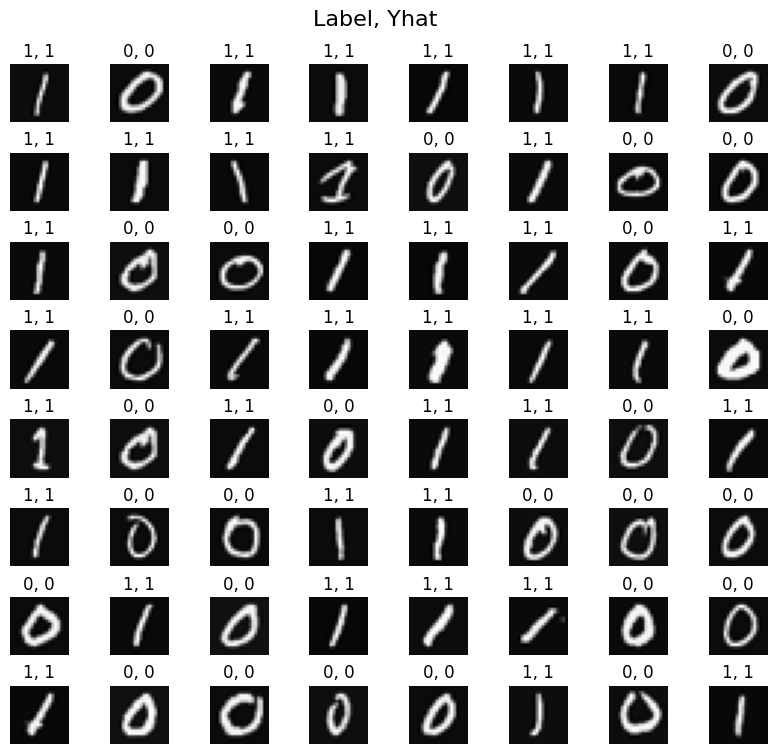

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid

from matplotlib.widgets import Slider
# from lab_utils_common import dlc
# from autils import plt_act_trio
# from lab_utils_relu import *
import warnings
# warnings.simplefilter(action='ignore', category=UserWarning)


3. ReLU
Công thức

f(x)=max(0,x)f(x)=max(0,x)

The softmax function can be written:
$$ a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} $$

In [7]:
def my_softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


In [10]:
from sklearn.datasets import make_blobs

In [11]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [13]:
#1. specific model
model = Sequential([
    Dense(25,activation="relu"),
    Dense(15,activation="relu"),
    Dense(4,activation="softmax"),
])
#2. Loss function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())

#3. traindata
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 2ms/step - loss: 0.7371
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0971
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 13/100
63/63 [=================

In [14]:
model.predict(X_train)

63/63 [==============================] - 0s 1ms/step


array([[2.3988305e-09, 1.9922464e-09, 9.9999917e-01, 8.0991265e-07],
       [9.9999988e-01, 6.8987937e-08, 1.4007783e-12, 2.6552323e-22],
       [9.9983251e-01, 1.6751293e-04, 1.3965534e-08, 1.5113708e-16],
       ...,
       [1.0678969e-05, 9.9931824e-01, 6.7112263e-04, 4.9365956e-09],
       [6.3292518e-27, 1.3912824e-17, 2.6470179e-09, 1.0000000e+00],
       [4.9466877e-07, 1.9520553e-07, 9.9999928e-01, 9.5679411e-08]],
      dtype=float32)

for more accurate

In [21]:
#1. specific model
preferred_model = Sequential([
    Dense(25,activation="relu"),
    Dense(15,activation="relu"),
    Dense(4,activation="linear"),
])
#2. Loss function
preferred_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

#3. traindata
preferred_model.fit(X_train,y_train,epochs=10)

Epoch 1/10


63/63 [==============================] - 1s 3ms/step - loss: 1.0620
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1368
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0327


In [22]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 2ms/step
two example output vectors:
 [[ -3.0296397   -1.8127604    4.1170115   -0.14386198]
 [  7.1336       0.22823916  -5.966101   -11.389416  ]]
largest value 13.463829 smallest value -17.287645


In [23]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[7.7390962e-04 2.6132094e-03 9.8274636e-01 1.3866526e-02]
 [9.9899656e-01 1.0013912e-03 2.0437894e-06 9.0182111e-09]]
largest value 1.0 smallest value 5.485576e-14


In [24]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-3.0296397  -1.8127604   4.1170115  -0.14386198], category: 2
[  7.1336       0.22823916  -5.966101   -11.389416  ], category: 0
[ 5.048202    0.73797333 -4.3386865  -8.924282  ], category: 0
[-1.810006   4.2866325 -2.2226722 -2.6276784], category: 1
[-1.096363  -1.8112253  7.217796  -3.5342667], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].


In [25]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [28]:
tf.random.set_seed(1234)  # applied to achieve consistent results
#1. chọn model
model = Sequential(
    [
        Dense(2, activation = 'relu' ),
        Dense(4, activation = 'linear')
    ]
)
#2 chọn hàm loss
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True))

# 3. train data

model.fit(X_train,y_train,epochs=10)


Epoch 1/10
4/4 [==============================] - 1s 2ms/step - loss: 3.6506
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 3.5820
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 3.5317
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 3.4975
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 3.4617
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 3.4306
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 3.3959
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 3.3661
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 3.3380
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 3.3012


## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer $a^{[1]}_0$ and $a^{[1]}_1$. As predicted above, classes 0 and 1 (blue and green) have  $a^{[1]}_0 = 0$ while classes 0 and 2 (blue and orange) have $a^{[1]}_1 = 0$.  
Once again, the intensity of the background color indicates the highest values.  
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.    
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).  
Unit 2 targets the lower right corner where class 2 (orange) resides.  
Unit 3 produces its highest values in the upper right selecting our final class (purple).  

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (`SparseCategoricalCrossEntropy`). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.